In [1]:
import os
import random

import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
import mr

In [4]:
from mrcnn import model as modellib
from mrcnn import visualize

Using TensorFlow backend.


In [5]:
def get_ax(rows=1, cols=1, size=8):
    fig, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return fig, ax

In [6]:
work_path = os.path.join("E:", os.sep, "RCNNPipes512Train")
os.chdir(work_path)

In [7]:
dataset = mr.MRDataset()
dataset.load(work_path)
dataset.prepare()

In [41]:
inference_config = mr.InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference",
                          config=inference_config,
                          model_dir="logs")

find_last = True
if find_last:
    model_path = model.find_last()
    print("Loading weights from ", model_path)
else:
    model_path = "mask_rcnn_mr_0500.h5"
model.load_weights(model_path, by_name=True)

Loading weights from  logs\mr20190517T2055\mask_rcnn_mr_0322.h5
Re-starting from epoch 322


In [16]:
inference_config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        30
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.0001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 10.0}
MASK_POOL_SIZE                 14
MASK_SHAPE            

In [17]:
fig_id = 1

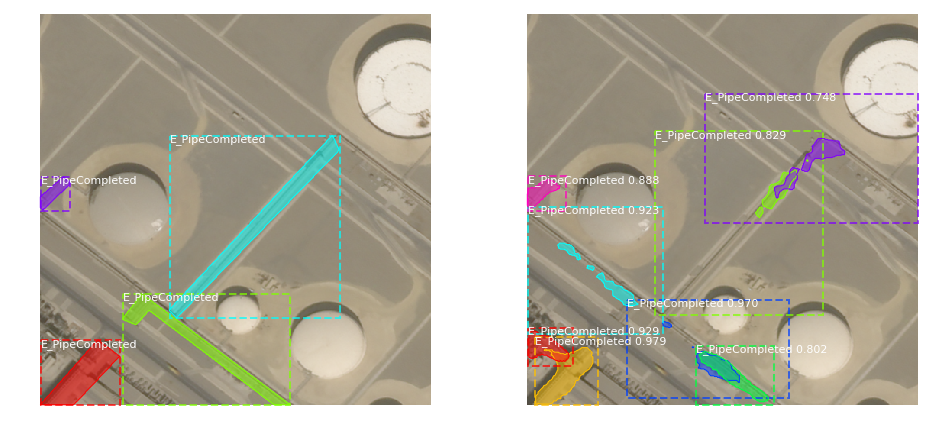

In [57]:
image_id = random.choice(dataset.image_ids)

original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, inference_config, 
                           image_id, use_mini_mask=False)

results = model.detect([original_image], verbose=0)
r = results[0]
fig, (ax1, ax2) = get_ax(1,2)
visualize.display_instances(original_image,
                            gt_bbox,
                            gt_mask,
                            gt_class_id, 
                            dataset.class_names,
                            ax=ax1)

visualize.display_instances(original_image,
                            r['rois'],
                            r['masks'],
                            r['class_ids'], 
                            dataset.class_names,
                            r['scores'],
                            ax=ax2)

In [ ]:
fig.savefig("pipes-train-{:03d}.png".format(fig_id))
fig_id += 1